# STAT 345 Prelim Exam Two

## Available Wednesday, April 2 at 8am Eastern Daylight Time

## Due Friday, April 4 by 9:15am Eastern Daylight Time

## Name: David Millard

You have 49.25 hours to do this exam, but it should only take $\lesssim$2 hours. You may use any books or notes you like, and any electronic devices with communication capabilities
switched off (airplane mode).  You should not communicate with anyone or look anything up on the internet from the time you start the exam to the time you submit it.

Some problems contain boxes ($\boxed{\color{brown}{????}}$) into which you should place your final
answer. Express all numerical results to at least three decimal places.

The exam contains three problems worth a total of 55 points. Try not to
spend too much time on any one problem. The weight of each part of each
problem is listed, as is the total weight for each problem. Later parts
of a problem may or may not depend on some, but not all, of the previous
parts.

**Show your work!**

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## 1. Multiple-Sample Methods (20 points total)

### 1.1 Independent Samples

Consider the following data, assumed to represent the ranks of the data in three independent samples:

<table>
<tr><th>Sample 1</th><th>Sample 2</th><th>Sample 3</th></tr>
<tr><td>$14$</td><td>$11$</td><td>$15$</td></tr>
<tr><td>$1$</td><td>$4$</td><td>$8$</td></tr>
<tr><td>$7$</td><td>$12$</td><td>$13$</td></tr>
<tr><td>$5$</td><td>$6$</td><td>$9$</td></tr>
<tr><td>$2$</td><td>$3$</td><td>$10$</td></tr>
</table>

**(a)** \[5pts\] Calculate the Kruskal-Wallis statistic, giving the value of all intermediate quantities, notably the three individual rank sums.

In [40]:
R_i_j = [
    np.array([14, 1, 7, 5, 2]),
    np.array([11, 4, 12, 6, 3]),
    np.array([15, 8, 13, 9, 10]),
]

In [41]:
def kruskal_wallis(R_i_j):
    n_i = np.array([len(Ri_j) for Ri_j in R_i_j])
    k = len(n_i)
    
    print(k-1)
    
    N = np.sum(n_i)
    
    R_r = np.concatenate(R_i_j)
    R_i = np.array([np.sum(Ri_j) for Ri_j in R_i_j])
    
    print(R_i)
    
    Rbar = 0.5*(N+1)
    T = (N-1) * np.sum((R_i-n_i*Rbar)**2/n_i) / np.sum((R_r-Rbar)**2)
    
    p = stats.chi2(df=k-1).sf(T)
    
    return T, p

kruskal_wallis(R_i_j)

2
[29 36 55]


(3.6200000000000006, 0.163654136802704)

$$\hbox{Rank sum for Sample 1} = \boxed{\color{brown}{29}}$$

$$\hbox{Rank sum for Sample 2} = \boxed{\color{brown}{36}}$$

$$\hbox{Rank sum for Sample 3} = \boxed{\color{brown}{?55}}$$

$$\hbox{Statistic value} = \boxed{\color{brown}{3.62}}$$

<font color="red">**5/5**</font>

**(b)** \[2pts\] If the samples are all drawn from the same distribution, the Kruskal-Wallis statistic should be approximately chi-squared distributed; what is the number of degrees of freedom?

$$\hbox{# of degrees of freedom} = \boxed{\color{brown}{2}}$$

<font color="red">**2/2**</font>

**(c)** \[2pts\] Using the chi-squared approximation, find the $p$-value.

$$\hbox{$p$-value} = \boxed{\color{brown}{0.16365}}$$

<font color="red">**2/2**</font>

### 1.2 Complete Block Design

Now assume the columns represent three different treatments and the rows represent five blocks to which those treatments are applied.

**(a)** \[3pts\] Enter in the table below the ranks within each block.

<table> 
<tr><th>Treatment 1</th><th>Treatment 2</th><th>Treatment 3</th></tr> 
<tr><td>2</td><td>1</td><td>3</td></tr> 
<tr><td>1</td><td>2</td><td>3</td></tr> 
<tr><td>1</td><td>2</td><td>3</td></tr> 
<tr><td>1</td><td>2</td><td>3</td></tr> 
<tr><td>1</td><td>2</td><td>3</td></tr> 
</table>

<font color="red">**3/3**</font>

**(b)** \[4pts\]  Calculate the Friedman statistic, giving the value of all intermediate quantities, notably the three individual rank sums.

In [48]:
def get_friedman(X_ij):
    b, k = np.shape(X_ij)
    
    print(k-1)
    
    R_ij = stats.rankdata(X_ij,axis=-1)
    
    print(R_ij)
    
    R_j = np.sum(R_ij,axis=0)
    
    print(R_j)
    
    T1 = (12/(b*k*(k+1)))*np.sum((R_j-0.5*b*(k+1))**2)
    p = stats.chi2(df=k-1).sf(T1)
    
    return T1, p

get_friedman(np.array(R_i_j).T)

2
[[2. 1. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[ 6.  9. 15.]


(8.4, 0.014995576820477707)

$$\hbox{Rank sum for Treatment 1} = \boxed{\color{brown}{6}}$$

$$\hbox{Rank sum for Treatment 2} = \boxed{\color{brown}{9}}$$

$$\hbox{Rank sum for Treatment 3} = \boxed{\color{brown}{15}}$$

$$\hbox{Statistic value} = \boxed{\color{brown}{8.4}}$$

<font color="red">**4/4**</font>

**(c)** \[2pts\] If the samples are all drawn from the same distribution, the Friedman statistic should be approximately chi-squared distributed; what is the number of degrees of freedom?

$$\hbox{# of degrees of freedom} = \boxed{\color{brown}{2}}$$

<font color="red">**2/2**</font>

**(d)** \[2pts\] Using the chi-squared approximation, find the $p$-value.

$$\hbox{$p$-value} = \boxed{\color{brown}{0.01499}}$$

<font color="red">**2/2**</font>

## 2. Correlation Coëfficients (22 points total)

Consider the data

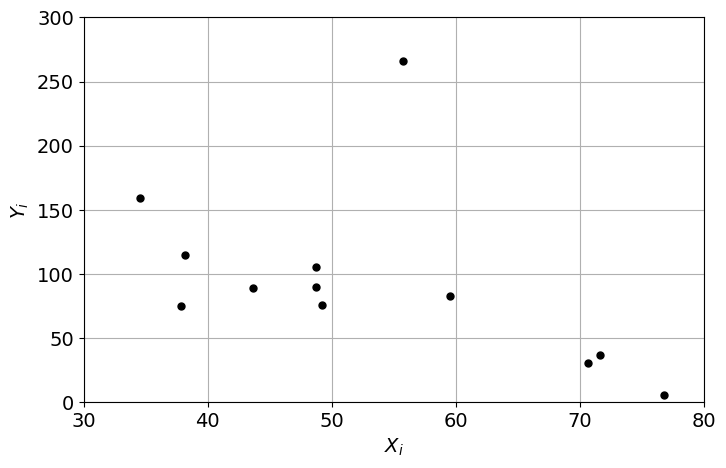

In [3]:
X_i = np.array([48.77, 37.87, 59.56, 38.18, 70.63, 43.64,
                55.75, 34.55, 71.61, 76.81, 48.76, 49.19])
Y_i = np.array([90.32, 75.23, 82.73, 115.03, 30.55, 88.92,
                266.19, 159.59, 37.01, 5.66, 105.23, 75.54])

plt.plot(X_i,Y_i,'k.',ms=10);
plt.grid();
plt.xlabel(r'$X_i$');
plt.ylabel(r'$Y_i$');
plt.xlim(30,80);
plt.ylim(0,300);

**(a)** \[3pts\] Compute the second moments of the ranks of the two data sets.

In [4]:
Rx_i = stats.rankdata(X_i)
Ry_i = stats.rankdata(Y_i)

Rbar = np.mean(Rx_i)

s1 = np.sum((Rx_i - Rbar)**2)
s2 = np.sum((Ry_i - Rbar)**2)
s3 = np.sum((Rx_i - Rbar)*(Ry_i - Rbar))

print(s1, s2, s3)

143.0 143.0 -87.0


$$\sum_{i=1}^n (R^x_i-\overline{R})^2 = \boxed{\color{brown}{143}}$$

$$\sum_{i=1}^n (R^y_i-\overline{R})^2 = \boxed{\color{brown}{143}}$$

$$\sum_{i=1}^n (R^x_i-\overline{R})(R^y_i-\overline{R}) = \boxed{\color{brown}{-87}}$$

<font color="red">**3/3**</font>

**(b)** \[3pts\] Compute the Spearman rank correlation coefficient for the data set.

In [5]:
rho = s3 / np.sqrt(s1*s2); rho

-0.6083916083916084

$$\rho = \boxed{\color{brown}{-0.6084}}$$

<font color="red">**3/3**</font>

**(c)** \[3pts\] If the data are uncorrelated, what are the expectation value and standard deviation of this statistic (numerical values)?

In [6]:
n = len(X_i)
sigma = 1 / np.sqrt(n - 1); sigma

0.30151134457776363

$$\hbox{Expectation Value} = \boxed{\color{brown}{0}}$$

$$\hbox{Standard deviation} = \boxed{\color{brown}{0.3015}}$$

<font color="red">**3/3**</font>

**(d)** \[2pts\] Calculate the $p$-value associated with the measured correlation coefficient $\rho$.  (The null hypothesisis no correlation, while the alternative hypothesis is some correlation or anticorrelation.)  Be sure to  specify any approximation used in this calculation.

We make a normality assumuption and use the normal approximation with $E[\rho] = 0$ and $\text{Var}[\rho] = \frac{1}{n-1}$. 

In [7]:
p = 2.0*stats.norm.cdf(rho*np.sqrt(n-1)); p

0.04361139781456327

$$\hbox{$p$-value} = \boxed{\color{brown}{0.043611}}$$

<font color="red">**2/2**</font>

**(e)** \[3pts\]  Determine the number of concordant and discordant pairs of data points.

In [10]:
import itertools

In [11]:
def is_concordant(pt1,pt2):
    return ((pt1[0]>pt2[0])&(pt1[1]>pt2[1])|(pt1[0]<pt2[0])&(pt1[1]<pt2[1]))
def is_discordant(pt1,pt2):
    return ((pt1[0]>pt2[0])&(pt1[1]<pt2[1])|(pt1[0]<pt2[0])&(pt1[1]>pt2[1]))

In [12]:
Nc = np.sum([is_concordant((X_i[i],Y_i[i]),(X_i[j],Y_i[j])) for (i,j) in itertools.combinations(range(n),2)])
Nd = np.sum([is_discordant((X_i[i],Y_i[i]),(X_i[j],Y_i[j])) for (i,j) in itertools.combinations(range(n),2)])

print(Nc, Nd)

17 49


$$N_c = \boxed{\color{brown}{17}}$$

$$N_d = \boxed{\color{brown}{49}}$$

<font color="red">**3/3**</font>

**(f)** \[3pts\] Compute the Kendall correlation coefficient for the data set.

In [13]:
tau = (Nc-Nd)/(Nc+Nd); tau

-0.48484848484848486

$$\tau = \boxed{\color{brown}{-0.4848}}$$

<font color="red">**3/3**</font>

**(g)** \[3pts\] If the data are uncorrelated, what are the expectation value and standard deviation of this statistic (numerical values)?

In [14]:
sigma = np.sqrt(( 2 * (2*n + 5) ) / ( 9*n * (n-1))); sigma

0.22095598842653896

$$\hbox{Expectation Value} = \boxed{\color{brown}{0}}$$

$$\hbox{Standard deviation} = \boxed{\color{brown}{0.220}}$$

<font color="red">**Actually, this rounds to 0.221.**</font>

<font color="red">**3/3**</font>

**(h)** \[2pts\] Calculate the $p$-value associated with the measured correlation coefficient $\tau$.  Be sure to  specify any approximation used in this calculation.

Again we make a normality assumption and use the normal approximation with $E[\tau] = 0$ and $\text{Var}[\tau] = \frac{2(2n+5)}{9n(n-1)}$. 

In [15]:
p = 2.0*stats.norm.cdf(tau/sigma); p

0.02821230197459869

$$\hbox{$p$-value} = \boxed{\color{brown}{0.02821}}$$

<font color="red">**2/2**</font>

## 3. Goodness of Fit Test (13 points total)

Consider the following sample of size $n=10$:

In [16]:
x_i = np.array([1.524, 1.217, 1.890, 1.998, 0.036, 1.785, 0.054, 0.459, 0.024, 0.053])

Supposed we have a null hypothesis that the data were drawn from a uniform distribution on the interval $(0,2)$.

**(a)** \[3pts\] Plot, on the same set of axes, the empirical (cumulative) distribution $\hat{F}(x;\{x_i\})$ and the hypothesized cdf $F^*(x)$ for $-0.1<x<2.1$.

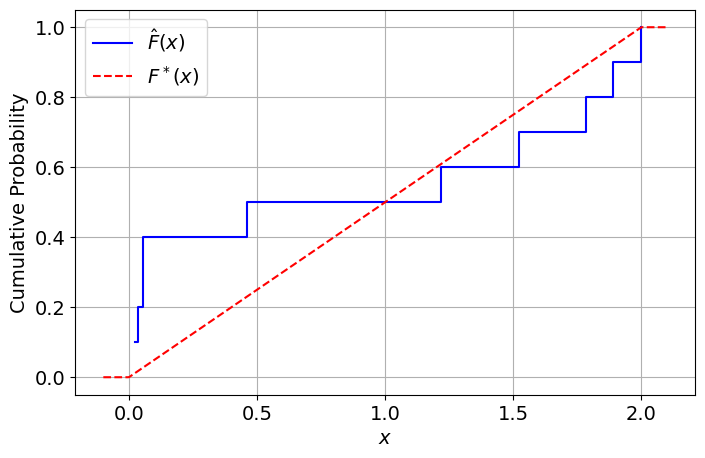

In [17]:
x_vals = np.linspace(-0.1, 2.1, 500)

# empirical cdf
ecdf_x = np.sort(x_i)
ecdf_y = np.arange(1, len(x_i) + 1) / len(x_i)

# hypothesized cdf
uniform_cdf = stats.uniform.cdf(x_vals, loc=0, scale=2)

plt.figure(figsize=(8, 5))
plt.step(ecdf_x, ecdf_y, where="post", label="$\hat{F}(x)$", color='b')
plt.plot(x_vals, uniform_cdf, label="$F^*(x)$", linestyle="dashed", color='r')
plt.xlabel("$x$")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid()

<font color="red">**You're missing $\hat{F}(x)$ for $-0.1<x<0.024$ and $1.998<x<2.1$.**</font>

<font color="red">**2/3**</font>

Consider a one-sample Kolmogorov test of the hypothesis that the data were drawn from a Uniform(0,2) distribution against the alternative of some other unspecified distribution.

**(b)** \[4pts\] Compute the standard Kolmogorov test statistics.

In [18]:
def cont_kolmagorov(x_i, Fstar_i):
    n = len(x_i)
    
    Fhatp_i = np.arange(n)/n
    Fhatm_i = (1+np.arange(n))/n
    
    Tp = max(Fstar_i-Fhatp_i)
    Tm = max(Fhatm_i-Fstar_i)
    T = max(Tp, Tm)
    
    p = stats.ksone(n).sf(T)
    
    return (T, Tp, Tm), p

In [19]:
sorted_x_i = np.sort(x_i)
Fstar_i = stats.uniform.cdf(sorted_x_i, loc=0, scale=2) # [loc, loc + scale]
cont_kolmagorov(sorted_x_i, Fstar_i)

((0.373, 0.1925, 0.373), 0.04660978935435248)

$$T^{+} = \boxed{\color{brown}{0.1925}}$$

$$T^{-} = \boxed{\color{brown}{0.373}}$$

$$T = \boxed{\color{brown}{0.373}}$$

<font color="red">**4/4**</font>

**(c)** \[3pts\] Using the Kolmogorov distribution, find the $p$-value arising from this test.

Using the output of the function above **(I made this function)**.

$$\hbox{$p$-value} = \boxed{\color{brown}{0.04660}}$$

<font color="red">**You need the two-sided $p$-value.  See solns.**</font>

<font color="red">**2/3**</font>

**(d)** \[3pts\] This data sample came from the “on-source” distribution (i.e., assuming the alternative hypothesis) of a Monte Carlo which produced the following ROC curve:

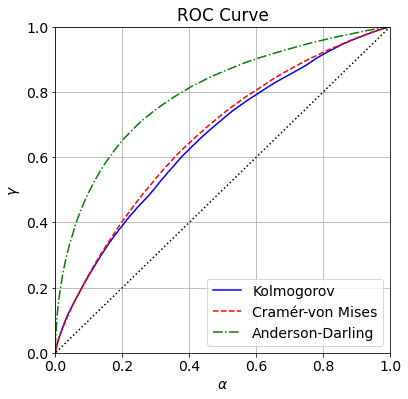

Which of the three tests shown is most powerful in distinguishing these hypotheses?

$$\boxed{\color{brown}{Anderson-Darling}}$$

<font color="red">**3/3**</font>

**(e)** \[extra credit\] What feature of the original data set makes the test identified in part (d) best suited to distinguishing it from the null hypothesis?

The Anderson-Darling test places more weight near the tails of the distribution. We can see that the points are grouped much more closely towards the edges rather than the middle, therefore the anderson darling statistic would be more effective in this scenario. 

<font color="red">**+3/3**</font>